# BWT code

### Function to compute the Burrows-Wheeler Transform (BWT) of a given string

In [97]:
# Function to compute the Burrows-Wheeler Transform (BWT) of a given string
def bwt(s):
    s = s + '$'

    # Compute all rotations of the string
    rotations = []
    for i in range(len(s)):
        rotation = s[i:] + s[:i]
        rotations.append(rotation)

    # Sort the rotations
    sorted_rotations = sorted(rotations)

    # Create the BWT by taking the last character of each sorted rotation
    bwt_result = ''.join(rotation[-1] for rotation in sorted_rotations)

    return bwt_result

### Function to reverse the Burrows-Wheeler Transform (BWT) of a given string

In [98]:
# Function to reverse the Burrows-Wheeler Transform (BWT) of a given string
def ibwt(bwt_result):
    # Initialize the table with empty strings
    table = [""] * len(bwt_result)

    # Perform the required number of iterations
    for _ in range(len(bwt_result)):
        # Insert the BWT string as the first column and sort the table
        table = sorted([bwt_char + row for bwt_char, row in zip(bwt_result, table)])

    # Find the row that ends with '$' and return the original string without '$'
    for row in table:
        if row.endswith('$'):
            return row[:-1]

### Function to find overlapping string

In [99]:
# Function to extract overlapping subsequences
def overlapping_subsequences(sequence, length, overlap):

    subsequences = []

    step = length - overlap # used to find the distance between the starting positions of consecutive subsequences extracted from the input sequence

    for i in range(0, len(sequence) - length + 1, step):
        subsequences.append(sequence[i:i + length])
    return subsequences

# RLE functions

In [100]:
def encode_rle(s):
    encoded_string = []
    count = 1

    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            count += 1
        else:
            encoded_string.append(s[i - 1] + str(count))
            count = 1

    encoded_string.append(s[-1] + str(count))
    return "".join(encoded_string)

In [101]:
def decode_rle(encoded_string):
    decoded_string = []
    current_char = ""
    current_count = ""

    for char in encoded_string:
        if char.isalpha() or char == "$":
            if current_char and current_count:
                decoded_string.append(current_char * int(current_count))
            current_char = char
            current_count = ""
        else:
            current_count += char

    if current_char and current_count:
        decoded_string.append(current_char * int(current_count))

    # return "".join(decoded_string)
    return decoded_string

# Data generation code

### Function to generate fibonacci word

In [102]:

def generate_fibonacci_word(order, alphabet):
    if order < 0:
        raise ValueError("Order must be a non-negative integer")
    if len(alphabet) != 2:
        raise ValueError("Alphabet must contain exactly two characters")

    fib_words = [alphabet[0], alphabet[1]]

    for i in range(2, order + 1):
        fib_words.append(fib_words[-1] + fib_words[-2])

    return fib_words[order]

# BWT testing functions

### Testing BWT functions

In [103]:
print ("abaababa")

bwt_result = bwt("abaababa")
print("BWT result:", bwt_result)

original_string = ibwt(bwt_result)
print("Recovered original string:", original_string)

abaababa
BWT result: abbb$aaaa
Recovered original string: abaababa


# Tests for overlapping strings

m is the length of each sample
d refers to the overalp
T is the new string that in generated

### Test for Golnaz example

In [104]:
sequence = "abbbababbbabbabb"
length = 4
overlap = 1
subsequences = overlapping_subsequences(sequence, length, overlap)

print(f"Original sequence: {sequence}")
print(f"Overlapping subsequences (length={length}, overlap={overlap}): {subsequences}")

print (''.join(subsequences))

Original sequence: abbbababbbabbabb
Overlapping subsequences (length=4, overlap=1): ['abbb', 'baba', 'abbb', 'babb', 'babb']
abbbbabaabbbbabbbabb


# Tests for data generation

### Generates a Fibonacci word of order

In [105]:
# Generate Fibonacci word of order 22 using a custom alphabet
# order = 22
order = 10
alphabet = "AB"  # Replace "AB" with any two distinct characters
fib_word = generate_fibonacci_word(order, alphabet)

print(f"Fibonacci word of order {order}:\n{fib_word}")

Fibonacci word of order 10:
BABBABABBABBABABBABABBABBABABBABBABABBABABBABBABABBABABBABBABABBABBABABBABABBABBABABBABBA


# Test to give to Golnaz

Next steps :

RUN BWT on orginal string
RUN BWT of new string
Find way to display the results

### run_length_encoding tests

In [106]:
# Generating the string sequence
alphabet = "AB"
fib_word = generate_fibonacci_word(10,alphabet)

# BWT of string sequence
print ("RLE on orginal string")
print ("fib_word : ",fib_word)
encoded_rle = encode_rle(fib_word)
print ("RLE of fibonacci_word : ", encoded_rle)
print ("decode of RLE of fibonacci_word : ", decode_rle(encoded_rle))
print ()
print ("RLE on BWT string")
print ("fib_word : ",fib_word)
print ("bwt fib_word",bwt(fib_word))
encoded_rle_bwt = encode_rle(bwt(fib_word))
print ("RLE of BWT fibonacci_word",encoded_rle_bwt )
dencoded_rle_bwt = decode_rle(encoded_rle_bwt)
print ("decode of RLE of BWT fibonacci_word",dencoded_rle_bwt)
print ("decode of BWT of fibonacci_word",ibwt(dencoded_rle_bwt))


print ("RLE on orginal string length :",len(encoded_rle))
print ("RLE on BWT orginal string length ",len(encoded_rle_bwt))


RLE on orginal string
fib_word :  BABBABABBABBABABBABABBABBABABBABBABABBABABBABBABABBABABBABBABABBABBABABBABABBABBABABBABBA
RLE of fibonacci_word :  B1A1B2A1B1A1B2A1B2A1B1A1B2A1B1A1B2A1B2A1B1A1B2A1B2A1B1A1B2A1B1A1B2A1B2A1B1A1B2A1B1A1B2A1B2A1B1A1B2A1B2A1B1A1B2A1B1A1B2A1B2A1B1A1B2A1B2A1
decode of RLE of fibonacci_word :  ['B', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A', 'B', 'A', 'BB', 'A', 'BB', 'A']

RLE on BWT string
fib_word :  BABBABABBABBABABBABABBABBABABBABBABABBABABBABBABABBABABBABBABABBABBABABBABABBABBABABBABBA
bwt fib_word ABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB$AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
RLE of BWT fibonacci_word A1B55$1A33
decode of RLE of BWT fibonacci_word ['A', 'BBBBBBBBBBBB

### Attempt to run BWT on the unique overlapping

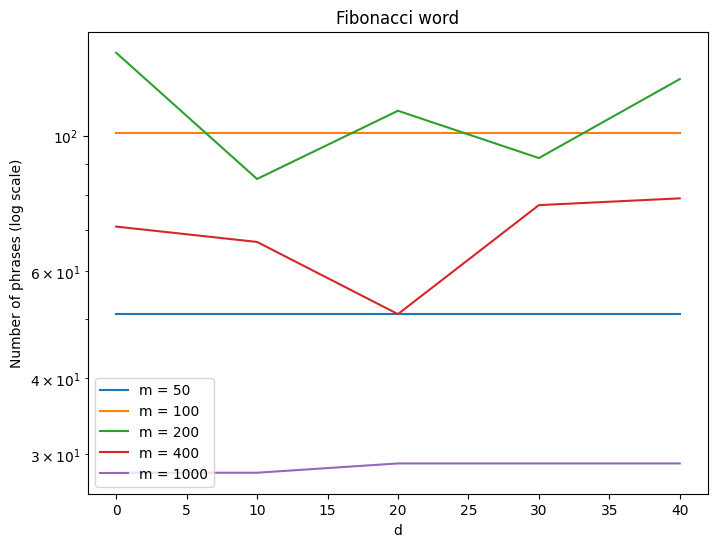

In [107]:
import matplotlib.pyplot as plt

# Test parameters
m_values = [50, 100, 200, 400, 1000]
min_m = min(m_values)
d_values = range(0, min_m,10)


# d_values = [1, 2, 4, 8, 16, 32, 64]
# d_values = [0,10, 20, 30, 40, 50, 60]
# m_values = range(50,1000,10)
# m_values = [50, 100, 200, 400, 1000]


alphabet = "AB"
fib_word = generate_fibonacci_word(22,alphabet)

results = {}
word = fib_word

for m in m_values:
    for d in d_values:
        subsequences = overlapping_subsequences(word, m, d)
        bwt_subsequences = []

        for subsequence in subsequences:
            bwt_result = bwt(subsequence)
            bwt_subsequences.append(bwt_result)

        unique_phrases = set(bwt_subsequences)
        num_phrases = len(unique_phrases)
        results[(m, d)] = num_phrases

# Visualize the results
fig, ax = plt.subplots(figsize=(8, 6))

fig.set_facecolor('white')
ax.set_facecolor('white')

for m in m_values:
    x = []
    for d in d_values:
        x.append(d)

    y = []
    for d in d_values:
        y.append(results[(m, d)])

    label = "m = {}".format(m)
    ax.plot(x, y, label=label)


ax.set_yscale("log")
ax.set_title("Fibonacci word")
ax.set_xlabel("d")
ax.set_ylabel("Number of phrases (log scale)")
ax.legend()
plt.show()


X-axis: The d values, which represent the overlap between subsequences. A higher d value means more overlap between subsequences.

Y-axis: The number of unique phrases (in log scale) generated by the BWT for the subsequences.

Lines: Each line in the plot corresponds to a different m value, which represents the length of the subsequences. The legend shows the m values for each line.
